In [ ]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [ ]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [1]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [46]:
df = pd.read_csv("cleaned_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()


,zipcode,room_type,accommodates,bedrooms,bathrooms,beds,minimum_nights,number_of_reviews,price,price_bin
0,94117,Entire home/apt,3,1.0,1.0,2.0,1,240,170.0,bin 144-180
1,94110,Entire home/apt,5,2.0,1.0,3.0,30,111,235.0,bin 216-252
2,94117,Private room,2,1.0,4.0,1.0,32,19,65.0,bin 36-72
3,94117,Private room,2,1.0,4.0,1.0,32,8,65.0,bin 36-72
4,94110,Private room,3,1.0,1.0,1.0,1,736,139.0,bin 108-144


In [3]:
df.groupby(['price_bin']).count()

,zipcode,room_type,accommodates,bedrooms,bathrooms,beds,minimum_nights,number_of_reviews,price
price_bin,,,,,,,,,
bin 0-36,87,87,87,87,87,87,87,87,87
bin 108-144,1331,1331,1331,1331,1331,1331,1331,1331,1331
bin 144-180,1143,1143,1143,1143,1143,1143,1143,1143,1143
bin 180-216,792,792,792,792,792,792,792,792,792
bin 216-252,653,653,653,653,653,653,653,653,653
bin 252-288,274,274,274,274,274,274,274,274,274
bin 288-324,320,320,320,320,320,320,320,320,320
bin 324-360,236,236,236,236,236,236,236,236,236
bin 36-72,914,914,914,914,914,914,914,914,914


In [ ]:
df.dtypes

# Select your features (columns)

In [4]:
# Set features. This will also be used as your x values. Set dependent variable or y to price_bin
target = df["price_bin"]
data = df.drop(["price", "price_bin"], axis=1)
feature_names = data.columns
data.head()


,zipcode,room_type,accommodates,bedrooms,bathrooms,beds,minimum_nights,number_of_reviews
0,94117,Entire home/apt,3,1.0,1.0,2.0,1,240
1,94110,Entire home/apt,5,2.0,1.0,3.0,30,111
2,94117,Private room,2,1.0,4.0,1.0,32,19
3,94117,Private room,2,1.0,4.0,1.0,32,8
4,94110,Private room,3,1.0,1.0,1.0,1,736


In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [9]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)


In [10]:
#transforming the data in zipcode and room_type using MultiColumnLabelEncoder
data2=MultiColumnLabelEncoder(columns = ['zipcode', 'room_type']).fit_transform(data)

In [11]:
#data2.groupby(['room_type','bed_type', 'zipcode' ]).count()
data2.groupby(['room_type', 'zipcode']).count()

accommodates  bedrooms  bathrooms  beds  minimum_nights  \
room_type zipcode                                                            
0         0                  15        15         15    15              15   
          1                 224       224        224   224             224   
          2                 288       288        288   288             288   
          3                   5         5          5     5               5   
          4                 131       131        131   131             131   
...                         ...       ...        ...   ...             ...   
2         17                  5         5          5     5               5   
          19                  2         2          2     2               2   
          23                  1         1          1     1               1   
          24                 38        38         38    38              38   
          26                  4         4          4     4               4   

                   number_of_reviews  
room_type zipcode                     
0         0                       15  
          1                      224  
          2                      288  
          3                        5  
          4                      131  
...                              ...  
2         17                       5  
          19                       2  
          23                       1  
          24                      38  
          26                       4  

[73 rows x 6 columns]

# Create a Train Test Split

Use `price` for the y values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data2, target, random_state=42)

In [13]:
X_train.head()

,zipcode,room_type,accommodates,bedrooms,bathrooms,beds,minimum_nights,number_of_reviews
5444,1,1,2,1.0,1.0,1.0,2,10
5802,2,0,2,0.0,1.0,0.0,30,0
1578,1,1,4,0.0,1.0,2.0,2,2
1789,11,0,4,2.0,2.0,2.0,30,3
2818,5,0,6,3.0,1.0,3.0,30,2


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [14]:
# Scale your data

from sklearn.preprocessing import MinMaxScaler

X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled= X_minmax.transform(X_test)

# Train the Model



In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
#printing the score before tuning/optimizing
print(f"Training Data Score: {rf.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf.score(X_test_scaled, y_test)}")

Training Data Score: 0.8710021321961621
Testing Data Score: 0.324453915823122


In [17]:
#getting the importance of features
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.356838356892939, 'number_of_reviews'),
 (0.27181129216649713, 'zipcode'),
 (0.08376665853827503, 'accommodates'),
 (0.06469616788129343, 'bathrooms'),
 (0.06341580935203053, 'beds'),
 (0.058403063780098255, 'minimum_nights'),
 (0.05177620093851263, 'room_type'),
 (0.049292450450354006, 'bedrooms')]

In [18]:
#converting array to list for chart of feature importance
list_feature_importances = rf.feature_importances_.tolist()
list_feature_importances
list_feature_names=feature_names.tolist()
list_feature_names

['zipcode',
 'room_type',
 'accommodates',
 'bedrooms',
 'bathrooms',
 'beds',
 'minimum_nights',
 'number_of_reviews']

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [19]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [250, 300, 350],
              'max_depth': [125, 150, 175]}
grid = GridSearchCV(rf, param_grid, verbose=3)

In [20]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] max_depth=125, n_estimators=250 .................................
[CV] ..... max_depth=125, n_estimators=250, score=0.360, total=   1.0s
[CV] max_depth=125, n_estimators=250 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ..... max_depth=125, n_estimators=250, score=0.331, total=   1.1s
[CV] max_depth=125, n_estimators=250 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.1s remaining:    0.0s


[CV] ..... max_depth=125, n_estimators=250, score=0.347, total=   1.0s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.362, total=   1.2s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.327, total=   1.4s
[CV] max_depth=125, n_estimators=300 .................................
[CV] ..... max_depth=125, n_estimators=300, score=0.343, total=   1.2s
[CV] max_depth=125, n_estimators=350 .................................
[CV] ..... max_depth=125, n_estimators=350, score=0.361, total=   1.5s
[CV] max_depth=125, n_estimators=350 .................................
[CV] ..... max_depth=125, n_estimators=350, score=0.337, total=   1.5s
[CV] max_depth=125, n_estimators=350 .................................
[CV] ..... max_depth=125, n_estimators=350, score=0.347, total=   1.4s
[CV] max_depth=150, n_estimators=250 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   33.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [21]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 175, 'n_estimators': 350}
0.35127931769722814


In [22]:
# Training score:
grid.score(X_train_scaled, y_train)

0.8903695806680881

In [23]:
# Testing score:
grid.score(X_test_scaled, y_test)

0.34469898774640384

In [24]:
# Make prediction and save to variable for report.
predictions = grid.predict(X_test_scaled)

In [25]:
# Print Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    bin 0-36       0.60      0.29      0.39        21
 bin 108-144       0.33      0.31      0.32       334
 bin 144-180       0.28      0.34      0.31       279
 bin 180-216       0.25      0.26      0.25       187
 bin 216-252       0.21      0.19      0.20       170
 bin 252-288       0.21      0.16      0.18        76
 bin 288-324       0.27      0.19      0.22        86
 bin 324-360       0.21      0.19      0.20        62
   bin 36-72       0.57      0.63      0.60       217
 bin 360-396       0.15      0.08      0.11        25
 bin 396-432       0.17      0.22      0.19        32
 bin 432-468       0.00      0.00      0.00        22
 bin 468-504       0.00      0.00      0.00        10
  bin 72-108       0.47      0.49      0.48       356

    accuracy                           0.34      1877
   macro avg       0.27      0.24      0.25      1877
weighted avg       0.34      0.34      0.34      1877



In [ ]:
#classification report
%matplotlib notebook
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(RandomForestClassifier())
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.finalize()
viz.show(outpath="classificationreport.png")

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is if all data was put into right price bins? High precision relates to the low false positive rate

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. 

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. 


In [ ]:
#from yellowbrick.model_selection import FeatureImportances
#from yellowbrick.style import set_palette
#from yellowbrick.features import RadViz
#set_palette('yellowbrick')
#viz2 = FeatureImportances(rf, size=(5000, 5000))
#viz2.fit(X_train_scaled, y_train)
#viz2.show(outpath="featureimportance.png")


In [62]:
list_feature_importances
list_feature_importances=sorted(list_feature_importances, reverse=False)

In [32]:
list_feature_names

['zipcode',
 'room_type',
 'accommodates',
 'bedrooms',
 'bathrooms',
 'beds',
 'minimum_nights',
 'number_of_reviews']

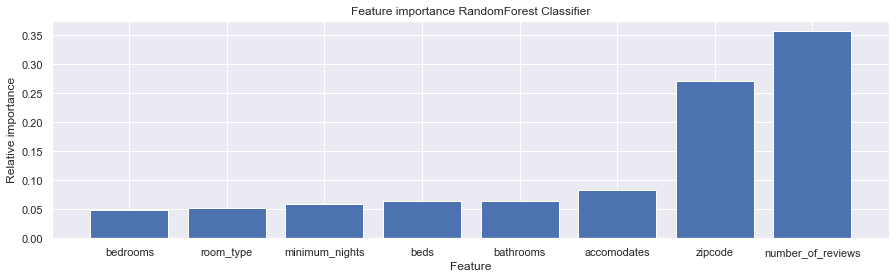

In [65]:
import matplotlib.pyplot as plt
import numpy as np

height = list_feature_importances
bars=('bedrooms','room_type','minimum_nights','beds','bathrooms','accomodates','zipcode','number_of_reviews')
plt.figure(figsize=(15,4))
y_pos = np.arange(len(bars))
plt.xticks (y_pos, bars)
plt.bar(y_pos, height)

plt.title('Feature importance RandomForest Classifier')
plt.xlabel('Feature')
plt.ylabel('Relative importance') 
plt.savefig('featureimportanceRF.png') 
plt.show()

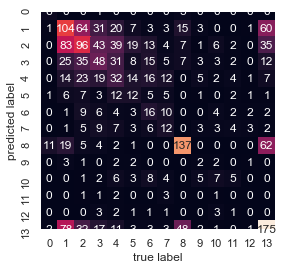

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrixRF.png', bbox_inches='tight', pad_inches=0.0)


                   accommodates  bedrooms  bathrooms      beds  \
accommodates           1.000000  0.699169   0.164641  0.768129   
bedrooms               0.699169  1.000000   0.246700  0.669118   
bathrooms              0.164641  0.246700   1.000000  0.230968   
beds                   0.768129  0.669118   0.230968  1.000000   
minimum_nights         0.000449 -0.003393  -0.004455  0.004078   
number_of_reviews     -0.028749 -0.060813  -0.067081 -0.018456   
price                  0.567795  0.522802   0.032988  0.417221   

                   minimum_nights  number_of_reviews     price  
accommodates             0.000449          -0.028749  0.567795  
bedrooms                -0.003393          -0.060813  0.522802  
bathrooms               -0.004455          -0.067081  0.032988  
beds                     0.004078          -0.018456  0.417221  
minimum_nights           1.000000          -0.005382 -0.011888  
number_of_reviews       -0.005382           1.000000 -0.103208  
price           

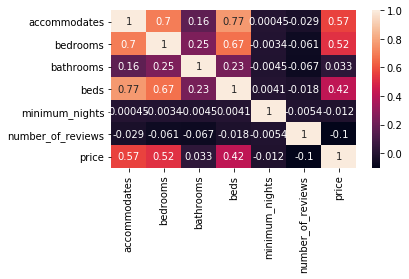

In [38]:
import seaborn as sn
import matplotlib.pyplot as plt
df_matrix = df.drop(["zipcode", "room_type"], axis=1)
corrMatrix = df_matrix.corr()
print (corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.tight_layout()
plt.autoscale()

plt.savefig('correlation_matrix.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

# Save the Model

In [48]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'modelRF.sav'
joblib.dump(rf, filename)

['modelRF.sav']